In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

FT-1001       5040
FT-1002       5182
FT-1201       6035
FT-1187       5090
QT-1119       6198
QT-1214       6201
TT-1148       4988
TT-1232       4964
TT-1293       4962
FT-1000       5025
LT-1113       5899
PT-1115       5127
QT-1121       6204
FT-1786      14054
FT-1371       5973
FT-1686       4975
FT-1687       5012
FT-1836       4920
FT-1685       4881
CTA water    71541
dtype: int64


c:\Python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 282.0769 - mae: 2.8531 - val_loss: 168.1564 - val_mae: 2.5437
Epoch 2/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 138.2967 - mae: 1.8143 - val_loss: 100.0902 - val_mae: 1.5312
Epoch 3/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 102.0656 - mae: 1.6262 - val_loss: 64.5443 - val_mae: 1.5128
Epoch 4/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 70.9502 - mae: 1.5198 - val_loss: 46.4503 - val_mae: 1.2418
Epoch 5/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 51.4464 - mae: 1.3147 - val_loss: 49.1802 - val_mae: 1.2553
Epoch 6/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 37.7031 - mae: 1.2481 - val_loss: 31.1208 - val_mae: 1.1168
Epoch 7/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 36.3809 - mae: 1.2311 - val_loss: 30.9266 - val_mae: 1.1049
Epoch 8/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 33.0638 - mae: 1.1937 - val_loss: 39.4106 - val_mae: 1.0697
Epoch 9/50


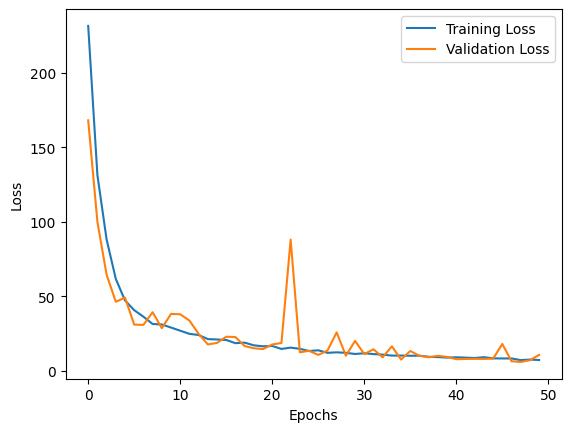

In [3]:
# Step 1: Load and Prepare Data
file_path = 'data.xlsx'
sheets_dict = pd.read_excel(file_path, sheet_name=None)
data = pd.concat(sheets_dict.values(), ignore_index=True)

print(data.isnull().sum())  # Check for missing values
data = data.dropna()  # Drop rows with missing values

X = data.drop('CTA water', axis=1)
y = data['CTA water']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Build the Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Step 3: Train the Model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Step 4: Evaluate the Model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss (MSE): {test_loss}')
print(f'Test MAE: {test_mae}')

# Step 5: Make Predictions
predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head(10))

# Step 6: Plot Training History
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Step 1: Load and Prepare Data
file_path = 'data.xlsx'
sheets_dict = pd.read_excel(file_path, sheet_name=None)
data = pd.concat(sheets_dict.values(), ignore_index=True)

print(data.isnull().sum())  # Check for missing values
data = data.dropna()  # Drop rows with missing values

X = data.drop('CTA water', axis=1)
y = data['CTA water']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Build the Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Dropout 20% of neurons
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Step 3: Train the Model with Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# Step 4: Evaluate the Model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss (MSE): {test_loss}')
print(f'Test MAE: {test_mae}')

# Step 5: Make Predictions
predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head(10))

# Step 6: Plot Training History
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()